In [11]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
from keras.models import Model
from keras.layers import Input, Conv2D, MaxPooling2D, UpSampling2D, concatenate, Conv2DTranspose, BatchNormalization, Dropout, Lambda
import tensorflow as tf
import os
import glob
import cv2
import numpy as np
from matplotlib import pyplot as plt
import albumentations as A

Carregar o modelo

In [4]:
model = tf.keras.models.load_model('/content/drive/MyDrive/Rachadura_Eucalipto/Analise rachadura/CNN/model/UNET/model_unet_1500t_final_model.h5',compile=False)

/usr/local/lib/python3.7/dist-packages/keras/layers/core/lambda_layer.py:305: UserWarning: segmentation_models.backbones.inception_resnet_v2 is not loaded, but a Lambda layer uses it. It may cause errors.
  'function_type')


In [5]:
SIZE_Y,SIZE_X = 256,256

images_test = []

for directory_path in glob.glob("/content/drive/MyDrive/Rachadura_Eucalipto/Analise rachadura/CNN/test/Images"): ###caminho para as imagens
    for img_path in sorted(glob.glob(os.path.join(directory_path, "*.png"))):
        img = cv2.imread(img_path)       
        img = cv2.resize(img, (SIZE_Y, SIZE_X))
        images_test.append(img)
       
#Convert list to array for machine learning processing        
images_test = np.array(images_test)



In [8]:
mask_test = []

for directory_path in glob.glob('/content/drive/MyDrive/Rachadura_Eucalipto/Analise rachadura/CNN/test/mask'):
    for mask_path in sorted(glob.glob(os.path.join(directory_path, "*.png"))):
        mask = cv2.imread(mask_path, 0)       
        mask = cv2.resize(mask, (SIZE_Y, SIZE_X), interpolation = cv2.INTER_NEAREST)  #Otherwise ground truth changes due to interpolation
        mask_test.append(mask)

mask_test = np.array(mask_test)

In [9]:
images_test_normal = tf.keras.utils.normalize(images_test, axis=1)

mask_test_input = np.expand_dims(mask_test, axis=3)

In [ ]:
y_pred = model.predict(images_test_normal)
y_pred_argmax = np.argmax(y_pred, axis=3)

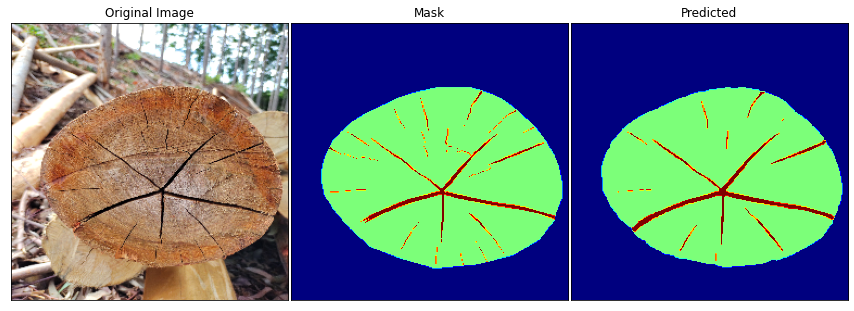

In [23]:
im = 3 ### escolher imagens
fig,ax = plt.subplots(nrows=1 ,ncols=3,figsize=(15,10))
ax[0].imshow(cv2.cvtColor(images_test[im],cv2.COLOR_BGR2RGB))
ax[0].set_xticks([])
ax[0].set_yticks([])
ax[0].set_title('Original Image')

ax[1].imshow(mask_test[im], cmap='jet')
ax[1].set_xticks([])
ax[1].set_yticks([])
ax[1].set_title('Mask')

ax[2].imshow(y_pred_argmax[im],cmap='jet')
ax[2].set_xticks([])
ax[2].set_yticks([])
ax[2].set_title('Predicted')

plt.subplots_adjust(wspace=0.01)

Para outras fotos 

In [41]:
Image = cv2.imread('/content/drive/MyDrive/Rachadura_Eucalipto/Analise rachadura/CNN/test/others/1666042238858.jpg')       
Image = cv2.resize(Image, (SIZE_Y, SIZE_X), interpolation = cv2.INTER_NEAREST)  #Otherwise ground truth changes due to interpolation
images_test_normal = tf.keras.utils.normalize(Image, axis=1)
images_test_normal = np.expand_dims(images_test_normal, axis=0)
y_pred = model.predict(images_test_normal)
y_pred_argmax = np.argmax(y_pred, axis=3)

1/1 [==============================] - 1s 557ms/step


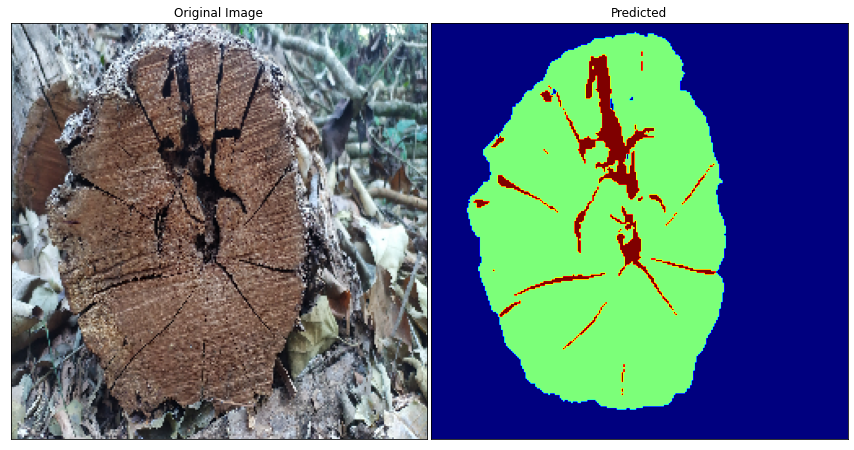

In [42]:

fig,ax = plt.subplots(nrows=1 ,ncols=2,figsize=(15,10))
ax[0].imshow(cv2.cvtColor(Image,cv2.COLOR_BGR2RGB))
ax[0].set_xticks([])
ax[0].set_yticks([])
ax[0].set_title('Original Image')

ax[1].imshow(y_pred_argmax[0  ],cmap='jet')
ax[1].set_xticks([])
ax[1].set_yticks([])
ax[1].set_title('Predicted')

plt.subplots_adjust(wspace=0.01)